In [1]:
import pandas as pd
dataset1=pd.read_csv("prep.csv",index_col=None)
df2=dataset1
df2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.000000,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.000000,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.000000,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.000000,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.000000,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,219.000000,...,37.000000,9800.000000,4.400000,no,no,no,yes,poor,no,yes
395,51.492308,70.000000,c,0.0,2.0,normal,normal,notpresent,notpresent,220.000000,...,27.000000,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes
396,51.492308,70.000000,c,3.0,0.0,normal,normal,notpresent,notpresent,110.000000,...,26.000000,9200.000000,3.400000,yes,yes,no,poor,poor,no,yes
397,51.492308,90.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,207.000000,...,38.868902,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes


In [2]:

from sklearn.model_selection import train_test_split 
#X_train, X_test, y_train, y_test = train_test_split(df2.drop('classification_yes', 1), df2['classification_yes'], test_size = .2, random_state=10)
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt

In [3]:
df2 = pd.get_dummies(df2, drop_first=True)

In [4]:
def selectkbest(indep_X,dep_Y):
        test = SelectKBest(score_func=chi2, k=5)
        fit1= test.fit(indep_X,dep_Y)
        # summarize scores
        features = indep_X.columns.values.tolist()
        np.set_printoptions(precision=2)
        print(features)
        print(fit1.scores_)
        #plt.figure(figsize=(12,3))
        #plt.bar(fit1.scores_,height=0.6)
        feature_series = pd.Series(data=fit1.scores_,index=features)
        feature_series.plot.bar()
        
        selectk_features = fit1.transform(indep_X)
        return selectk_features
def rfeFeature(indep_X, dep_Y, n):
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, n)
    rfe.fit(indep_X, dep_Y)
    
    X_rfe = indep_X.loc[:, rfe.support_]
    return rfe, X_rfe

def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        #X_train, X_test, y_train, y_test = train_test_split(indep_X,dep_Y, test_size = 0.25, random_state = 0)
        
        #Feature Scaling
        #from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        return X_train, X_test, y_train, y_test
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      
    
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
   
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         
    
    
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      


def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [5]:
indep_X=df2.drop('classification_yes', 1)
dep_Y=df2['classification_yes']

['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv', 'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_yes', 'pe_yes', 'ane_yes']
[1.14e+02 7.99e+01 2.16e+02 9.52e+01 2.44e+03 2.35e+03 3.56e+02 2.88e+01
 4.06e+00 1.26e+02 3.27e+02 1.28e+04 2.11e+01 8.23e+01 5.06e+01 4.52e+01
 4.22e+00 3.78e+00 1.08e+01 2.53e+01 1.33e+01 8.80e+01 8.19e+01 2.05e+01
 1.23e+01 4.32e+01 3.61e+01]


C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: 

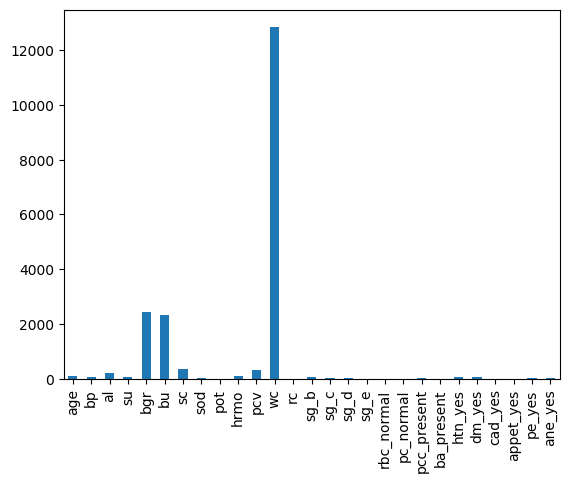

In [6]:
selectk_feature = selectkbest(indep_X, dep_Y)

rfe_model, rfe_feature = rfeFeature(indep_X, dep_Y, 5)

list1 = [indep_X, selectk_feature, rfe_feature]


In [7]:
for i in list1:
    
    X_train, X_test, y_train, y_test=split_scalar(i,dep_Y)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
 
    print(Accuracy)

0.99
0.95
0.98


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [9]:
def rfeFeature(indep_X,dep_Y,n):
        rfelist=[]
        
        log_model = LogisticRegression(solver='lbfgs')
        RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
       # NB = GaussianNB()
        DT= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        svc_model = SVC(kernel = 'linear', random_state = 0)
        #knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        rfemodellist=[log_model,svc_model,RF,DT] 
        for i in   rfemodellist:
            print(i)
            log_rfe = RFE(i, n)
            log_fit = log_rfe.fit(indep_X, dep_Y)
            log_rfe_feature=log_fit.transform(indep_X)
            rfelist.append(log_rfe_feature)
        return rfelist

In [10]:
        
rfelist=rfeFeature(indep_X,dep_Y,5)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: De

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklear

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [11]:
acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

In [12]:
for i in rfelist:   
    X_train, X_test, y_train, y_test=split_scalar(i,dep_Y)   
    
        
    classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
    acclog.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
    accsvml.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
    accsvmnl.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
    accknn.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
    accnav.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
    accdes.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
    accrf.append(Accuracy)
    
    print(Accuracy)


C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\en

0.98
0.99
0.98
0.99


C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Mohamed Imran\New folder\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [13]:
def rfe_classification():   
    rfedataframe=pd.DataFrame(index=['Logistic','SVC','Random','DecisionTree'],columns=['Logistic','SVMl','SVMnl',
                                                                                        'KNN','Navie','Decision','Random'])
    for number,idex in enumerate(rfedataframe.index):
        
        rfedataframe['Logistic'][idex]=acclog[number]       
        rfedataframe['SVMl'][idex]=accsvml[number]
        rfedataframe['SVMnl'][idex]=accsvmnl[number]
        rfedataframe['KNN'][idex]=accknn[number]
        rfedataframe['Navie'][idex]=accnav[number]
        rfedataframe['Decision'][idex]=accdes[number]
        rfedataframe['Random'][idex]=accrf[number]
    return rfedataframe


In [14]:
 rfe_classification()

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
Logistic,0.98,0.98,0.98,0.98,0.98,0.98,0.98
SVC,0.99,0.99,0.99,0.99,0.99,0.99,0.99
Random,0.97,0.98,0.98,0.97,0.91,0.96,0.98
DecisionTree,0.98,1,1,1,0.93,0.99,0.99


In [15]:
selected_features = indep_X.columns[rfe_model.support_]
print("Selected RFE Features:", list(selected_features))


Selected RFE Features: ['al', 'sg_c', 'sg_d', 'htn_yes', 'dm_yes']
